<a href="https://colab.research.google.com/github/epicalekspwner/BigScaleAnalytics2021/blob/main/BSA_project_AUTOMLv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language using Google Cloud

Hi !

Are you learning French? If yes this notebook is for you !

Steps to follow:

1. Run all the libraries
2. Write a french sentence
2. Get the level

Now you can enter whatever phrase in French and our model will predict its level for you !

## Libraries and account info

In this part you will need to enter the google account info !

In [ ]:
!pip install google-cloud-automl

In [1]:
# The json document is available at this address:https://github.com/epicalekspwner/BigScaleAnalytics2021/blob/main/Resources/project-bigscale-e16a4fc2448c.json you can download it

# Two possibilities:


# 1) You put the json file on google drive use the below code

from google.colab import drive
drive.mount('/content/gdrive')

#ensure the file is accessible
!ls /content/gdrive/'My Drive'

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/project-bigscale-e16a4fc2448c.json" # Replace this path with your path on google drive


# 2) If you run local

'''
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/project-bigscale-e16a4fc2448c.json" # Replace this path with your path to json on local machine

'''

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

Mounted at /content/gdrive
 predict.py			      project-bigscale-e16a4fc2448c.json
 project-bigscale-4f47b8bd1639.json  'Project BigScale-f383b6f5fded.json'
/content/gdrive/My Drive/project-bigscale-e16a4fc2448c.json


## 2) Calling our model

In [2]:
#Run me

phrase = str(input("Please enter your French sentence: "))

Please enter your French sentence: bonjour


In [3]:
import sys

from google.api_core.client_options import ClientOptions
from google.cloud import automl_v1
#from google.cloud.automl_v1 import proto
#from google.cloud.automl_v1.proto import service_pb2

def get_prediction(phrase, model_name):
  options = ClientOptions(api_endpoint='automl.googleapis.com')
  prediction_client = automl_v1.PredictionServiceClient(client_options=options)

  payload = {'text_snippet': {'content': phrase, 'mime_type': 'text/plain'} }
  # Uncomment the following line (and comment the above line) if want to predict on PDFs.
  # payload = pdf_payload(file_path)

  params = {}
  request = prediction_client.predict(name=model_name, payload=payload, params = params)
  return request  # waits until request is returned

In [4]:
class bcolors:
    HEADER = '\033[95m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def payload_info(predict):
  score_prob =[]
  level_prob = []


  for i in range(5):
    score_prob.append(predict.payload[i].classification.score)
    level_prob.append(predict.payload[i].display_name)
    plt.bar(level_prob, score_prob)
    plt.title('Predicted label probaility')
    plt.xlabel('Level')
    plt.ylabel('Probability')
  print('The predicted label is: ',bcolors.BOLD, bcolors.HEADER,predict.payload[0].display_name, '\n','\n')

## Results

The predicted label is:    A1 
 



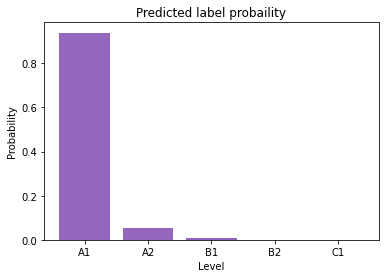

In [6]:
prediction_info = get_prediction(phrase, 'projects/210867998154/locations/us-central1/models/TCN3846560065913880576')

payload_info(prediction_info)